# ML_Regression_Quality Prediction in a Mining Process

##### DataSource: <https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process>

### Project Objective: To predict % silica in product after flotation process. The expected outcome for this project are as follows:
1. Improve reliability of process
2. Reduce waste water from process leading to environment friendly
3. Reduce cost of laboratory testing as soft sensor
    

In [1]:
# Import essential library

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import gdown
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split

## Load & Preview Data


In [2]:
file_name = 'Data12.csv'
file_url = 'https://drive.google.com/uc?id=1juuU3Q_Ixnc-xPyND7nzdzHWZiFSQDgH'

gdown.download(file_url, file_name, quiet = False)

# Read the CSV file
try:
    data_cl = pd.read_csv(file_name)
except pd.errors.ParserError as e:
    print("Error parsing CSV file:",e)

Downloading...
From (original): https://drive.google.com/uc?id=1juuU3Q_Ixnc-xPyND7nzdzHWZiFSQDgH
From (redirected): https://drive.google.com/uc?id=1juuU3Q_Ixnc-xPyND7nzdzHWZiFSQDgH&confirm=t&uuid=ce306ed2-b99d-43ff-a83d-7c91533c6e5c
To: /content/Data12.csv
100%|██████████| 184M/184M [00:04<00:00, 40.1MB/s]


In [3]:
data_cl.head()

date % Iron Feed % Silica Feed Starch Flow Amina Flow  \
0  2017-03-10 01:00:00        55,2         16,98     3019,53    557,434   
1  2017-03-10 01:00:00        55,2         16,98     3024,41    563,965   
2  2017-03-10 01:00:00        55,2         16,98     3043,46    568,054   
3  2017-03-10 01:00:00        55,2         16,98     3047,36    568,665   
4  2017-03-10 01:00:00        55,2         16,98     3033,69    558,167   

  Ore Pulp Flow Ore Pulp pH Ore Pulp Density Flotation Column 01 Air Flow  \
0       395,713     10,0664             1,74                      249,214   
1       397,383     10,0672             1,74                      249,719   
2       399,668      10,068             1,74                      249,741   
3       397,939     10,0689             1,74                      249,917   
4       400,254     10,0697             1,74                      250,203   

  Flotation Column 02 Air Flow  ... Flotation Column 07 Air Flow  \
0                      253,235  ...                      250,884   
1                      250,532  ...                      248,994   
2                      247,874  ...                      248,071   
3                      254,487  ...                      251,147   
4                      252,136  ...                      248,928   

  Flotation Column 01 Level Flotation Column 02 Level  \
0                   457,396                   432,962   
1                   451,891                    429,56   
2                    451,24                   468,927   
3                   452,441                   458,165   
4                   452,441                     452,9   

  Flotation Column 03 Level Flotation Column 04 Level  \
0                   424,954                   443,558   
1                   432,939                   448,086   
2                    434,61                   449,688   
3                   442,865                    446,21   
4                   450,523                    453,67   

  Flotation Column 05 Level Flotation Column 06 Level  \
0                   502,255                    446,37   
1                   496,363                   445,922   
2                   484,411                   447,826   
3                   471,411                    437,69   
4                   462,598                   443,682   

  Flotation Column 07 Level % Iron Concentrate % Silica Concentrate  
0                   523,344              66,91                 1,31  
1                   498,075              66,91                 1,31  
2                   458,567              66,91                 1,31  
3                   427,669              66,91                 1,31  
4                   425,679              66,91                 1,31  

[5 rows x 24 columns]

In [4]:
data_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

In [5]:
# Drop date column
data_cl=data_cl.drop('date',axis=1)
data_cl.head(5)

% Iron Feed % Silica Feed Starch Flow Amina Flow Ore Pulp Flow Ore Pulp pH  \
0        55,2         16,98     3019,53    557,434       395,713     10,0664   
1        55,2         16,98     3024,41    563,965       397,383     10,0672   
2        55,2         16,98     3043,46    568,054       399,668      10,068   
3        55,2         16,98     3047,36    568,665       397,939     10,0689   
4        55,2         16,98     3033,69    558,167       400,254     10,0697   

  Ore Pulp Density Flotation Column 01 Air Flow Flotation Column 02 Air Flow  \
0             1,74                      249,214                      253,235   
1             1,74                      249,719                      250,532   
2             1,74                      249,741                      247,874   
3             1,74                      249,917                      254,487   
4             1,74                      250,203                      252,136   

  Flotation Column 03 Air Flow  ... Flotation Column 07 Air Flow  \
0                      250,576  ...                      250,884   
1                      250,862  ...                      248,994   
2                      250,313  ...                      248,071   
3                      250,049  ...                      251,147   
4                      249,895  ...                      248,928   

  Flotation Column 01 Level Flotation Column 02 Level  \
0                   457,396                   432,962   
1                   451,891                    429,56   
2                    451,24                   468,927   
3                   452,441                   458,165   
4                   452,441                     452,9   

  Flotation Column 03 Level Flotation Column 04 Level  \
0                   424,954                   443,558   
1                   432,939                   448,086   
2                    434,61                   449,688   
3                   442,865                    446,21   
4                   450,523                    453,67   

  Flotation Column 05 Level Flotation Column 06 Level  \
0                   502,255                    446,37   
1                   496,363                   445,922   
2                   484,411                   447,826   
3                   471,411                    437,69   
4                   462,598                   443,682   

  Flotation Column 07 Level % Iron Concentrate % Silica Concentrate  
0                   523,344              66,91                 1,31  
1                   498,075              66,91                 1,31  
2                   458,567              66,91                 1,31  
3                   427,669              66,91                 1,31  
4                   425,679              66,91                 1,31  

[5 rows x 23 columns]

In [6]:
# Transform , to . and object type from str to float
for dt in data_cl.columns:
    data_cl[dt]=data_cl[dt].str.replace(',','.').astype(float)

In [7]:
data_cl.head()

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  Ore Pulp Flow  \
0         55.2          16.98      3019.53     557.434        395.713   
1         55.2          16.98      3024.41     563.965        397.383   
2         55.2          16.98      3043.46     568.054        399.668   
3         55.2          16.98      3047.36     568.665        397.939   
4         55.2          16.98      3033.69     558.167        400.254   

   Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
0      10.0664              1.74                       249.214   
1      10.0672              1.74                       249.719   
2      10.0680              1.74                       249.741   
3      10.0689              1.74                       249.917   
4      10.0697              1.74                       250.203   

   Flotation Column 02 Air Flow  Flotation Column 03 Air Flow  ...  \
0                       253.235                       250.576  ...   
1                       250.532                       250.862  ...   
2                       247.874                       250.313  ...   
3                       254.487                       250.049  ...   
4                       252.136                       249.895  ...   

   Flotation Column 07 Air Flow  Flotation Column 01 Level  \
0                       250.884                    457.396   
1                       248.994                    451.891   
2                       248.071                    451.240   
3                       251.147                    452.441   
4                       248.928                    452.441   

   Flotation Column 02 Level  Flotation Column 03 Level  \
0                    432.962                    424.954   
1                    429.560                    432.939   
2                    468.927                    434.610   
3                    458.165                    442.865   
4                    452.900                    450.523   

   Flotation Column 04 Level  Flotation Column 05 Level  \
0                    443.558                    502.255   
1                    448.086                    496.363   
2                    449.688                    484.411   
3                    446.210                    471.411   
4                    453.670                    462.598   

   Flotation Column 06 Level  Flotation Column 07 Level  % Iron Concentrate  \
0                    446.370                    523.344               66.91   
1                    445.922                    498.075               66.91   
2                    447.826                    458.567               66.91   
3                    437.690                    427.669               66.91   
4                    443.682                    425.679               66.91   

   % Silica Concentrate  
0                  1.31  
1                  1.31  
2                  1.31  
3                  1.31  
4                  1.31  

[5 rows x 23 columns]

In [8]:
data_cl.info() #precleaning data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation Column 06 Air Flow  737453 non-nul

## Data Exploration

###Data Correlation

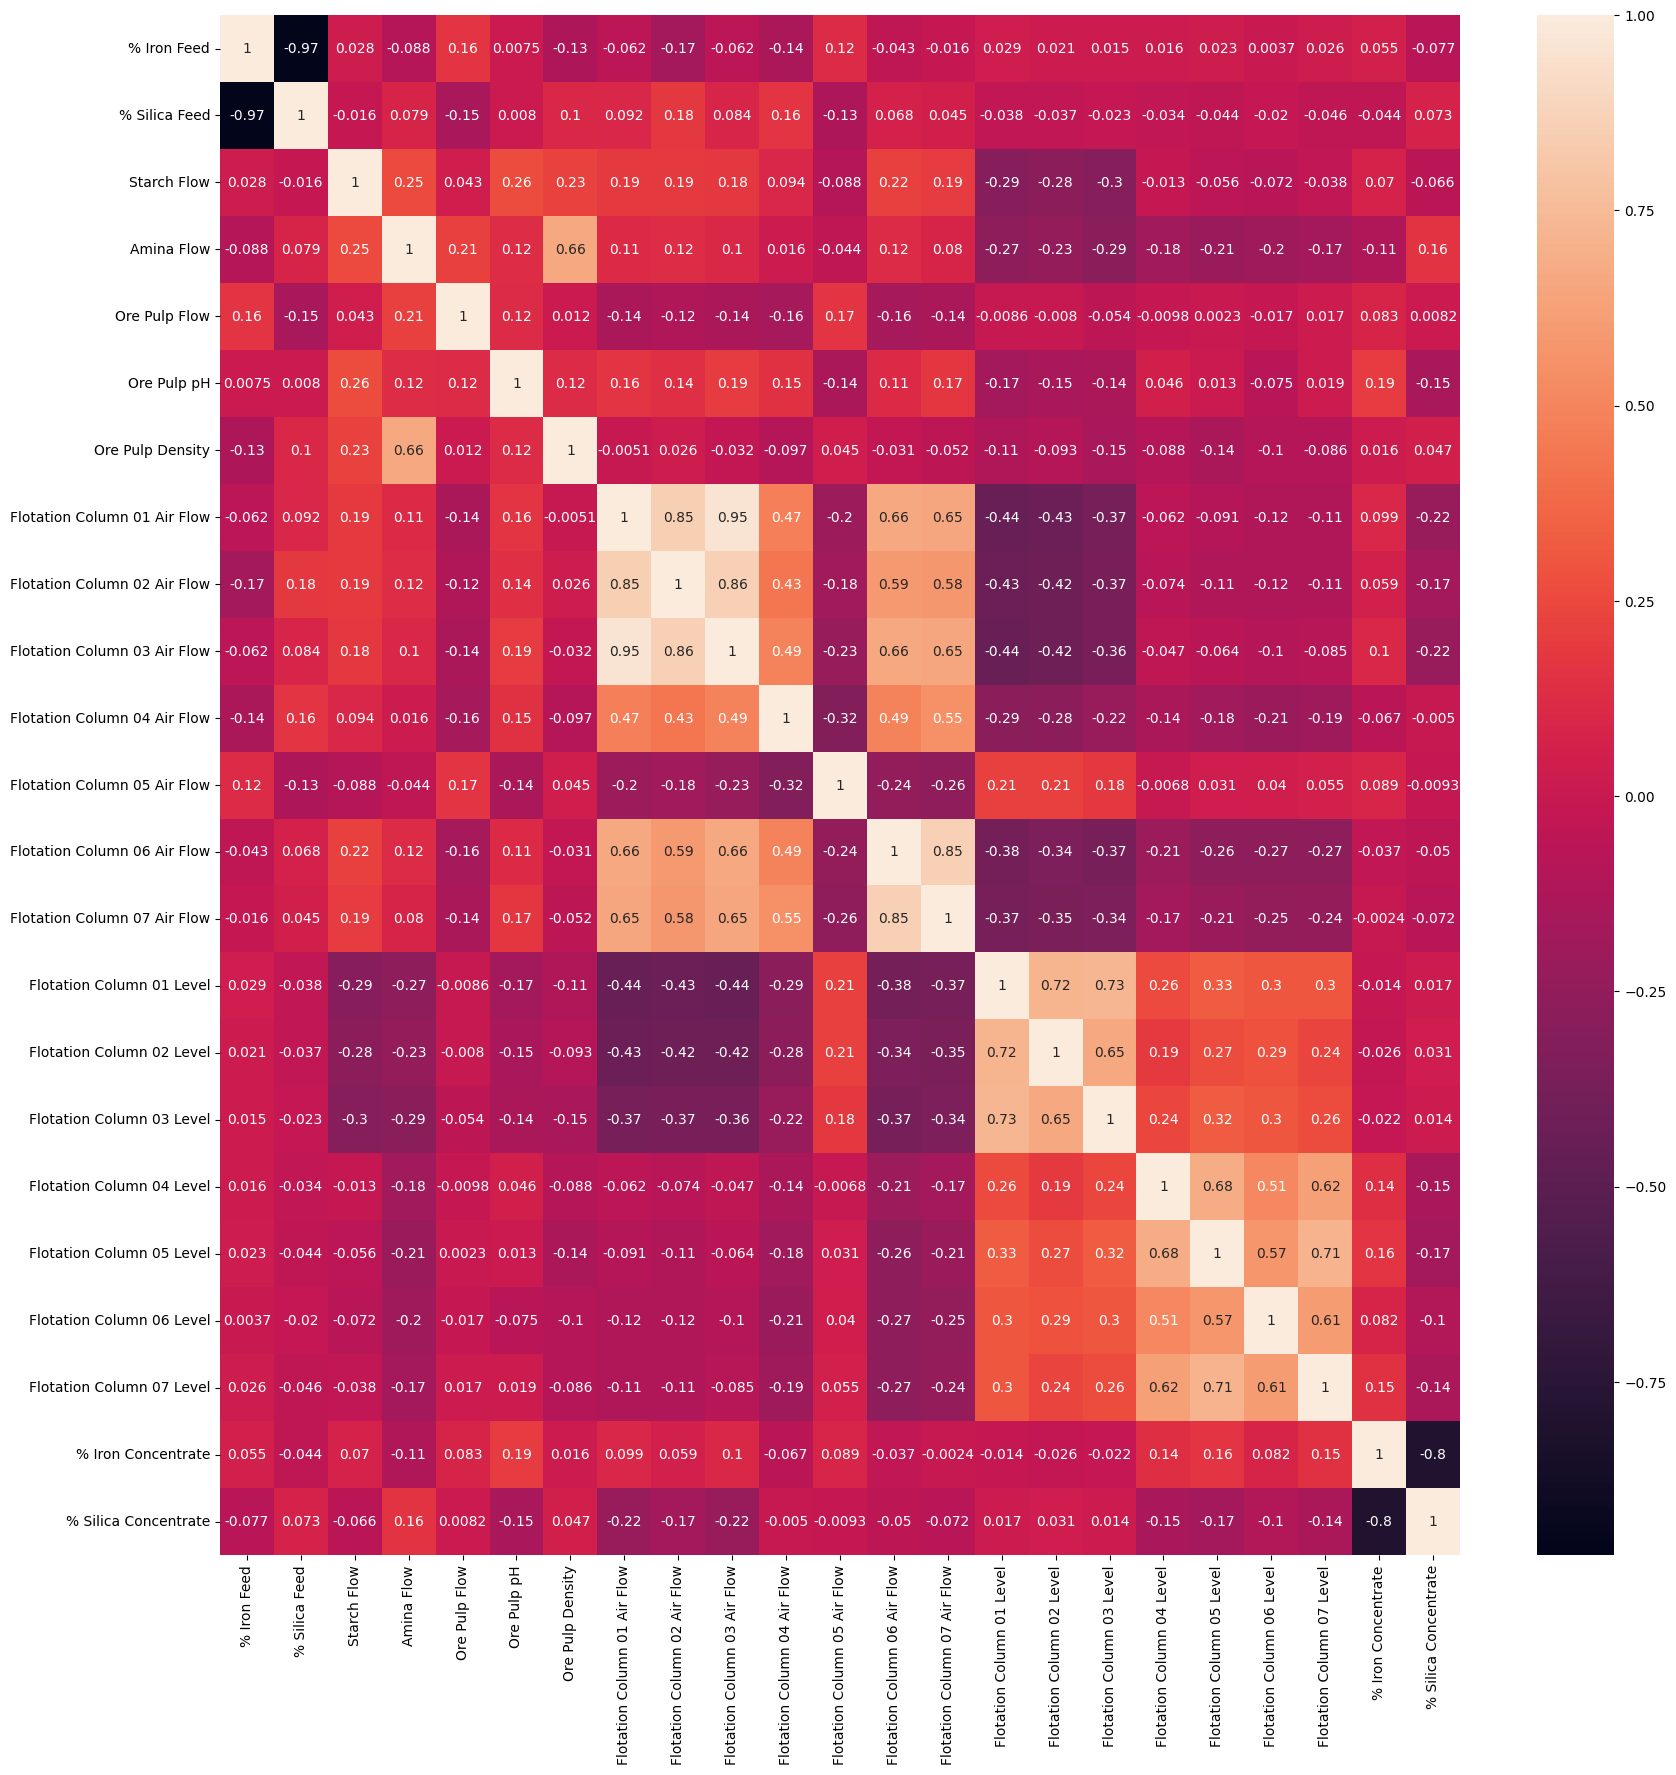

In [9]:
plt.figure(figsize=(20,20))
sn.heatmap(data_cl.corr(), annot=True)
plt.show()

#### From Correlation Matrix, the most important features are as follows:

- iron concentrate
- amina flow
- ore pulp flow
- ore pulp density
- flotation air flow (01|02|03)
- flotation column level (04|05|06|07)
- % silica feed (**Added by sense of my mind)


In [10]:
data_cl.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

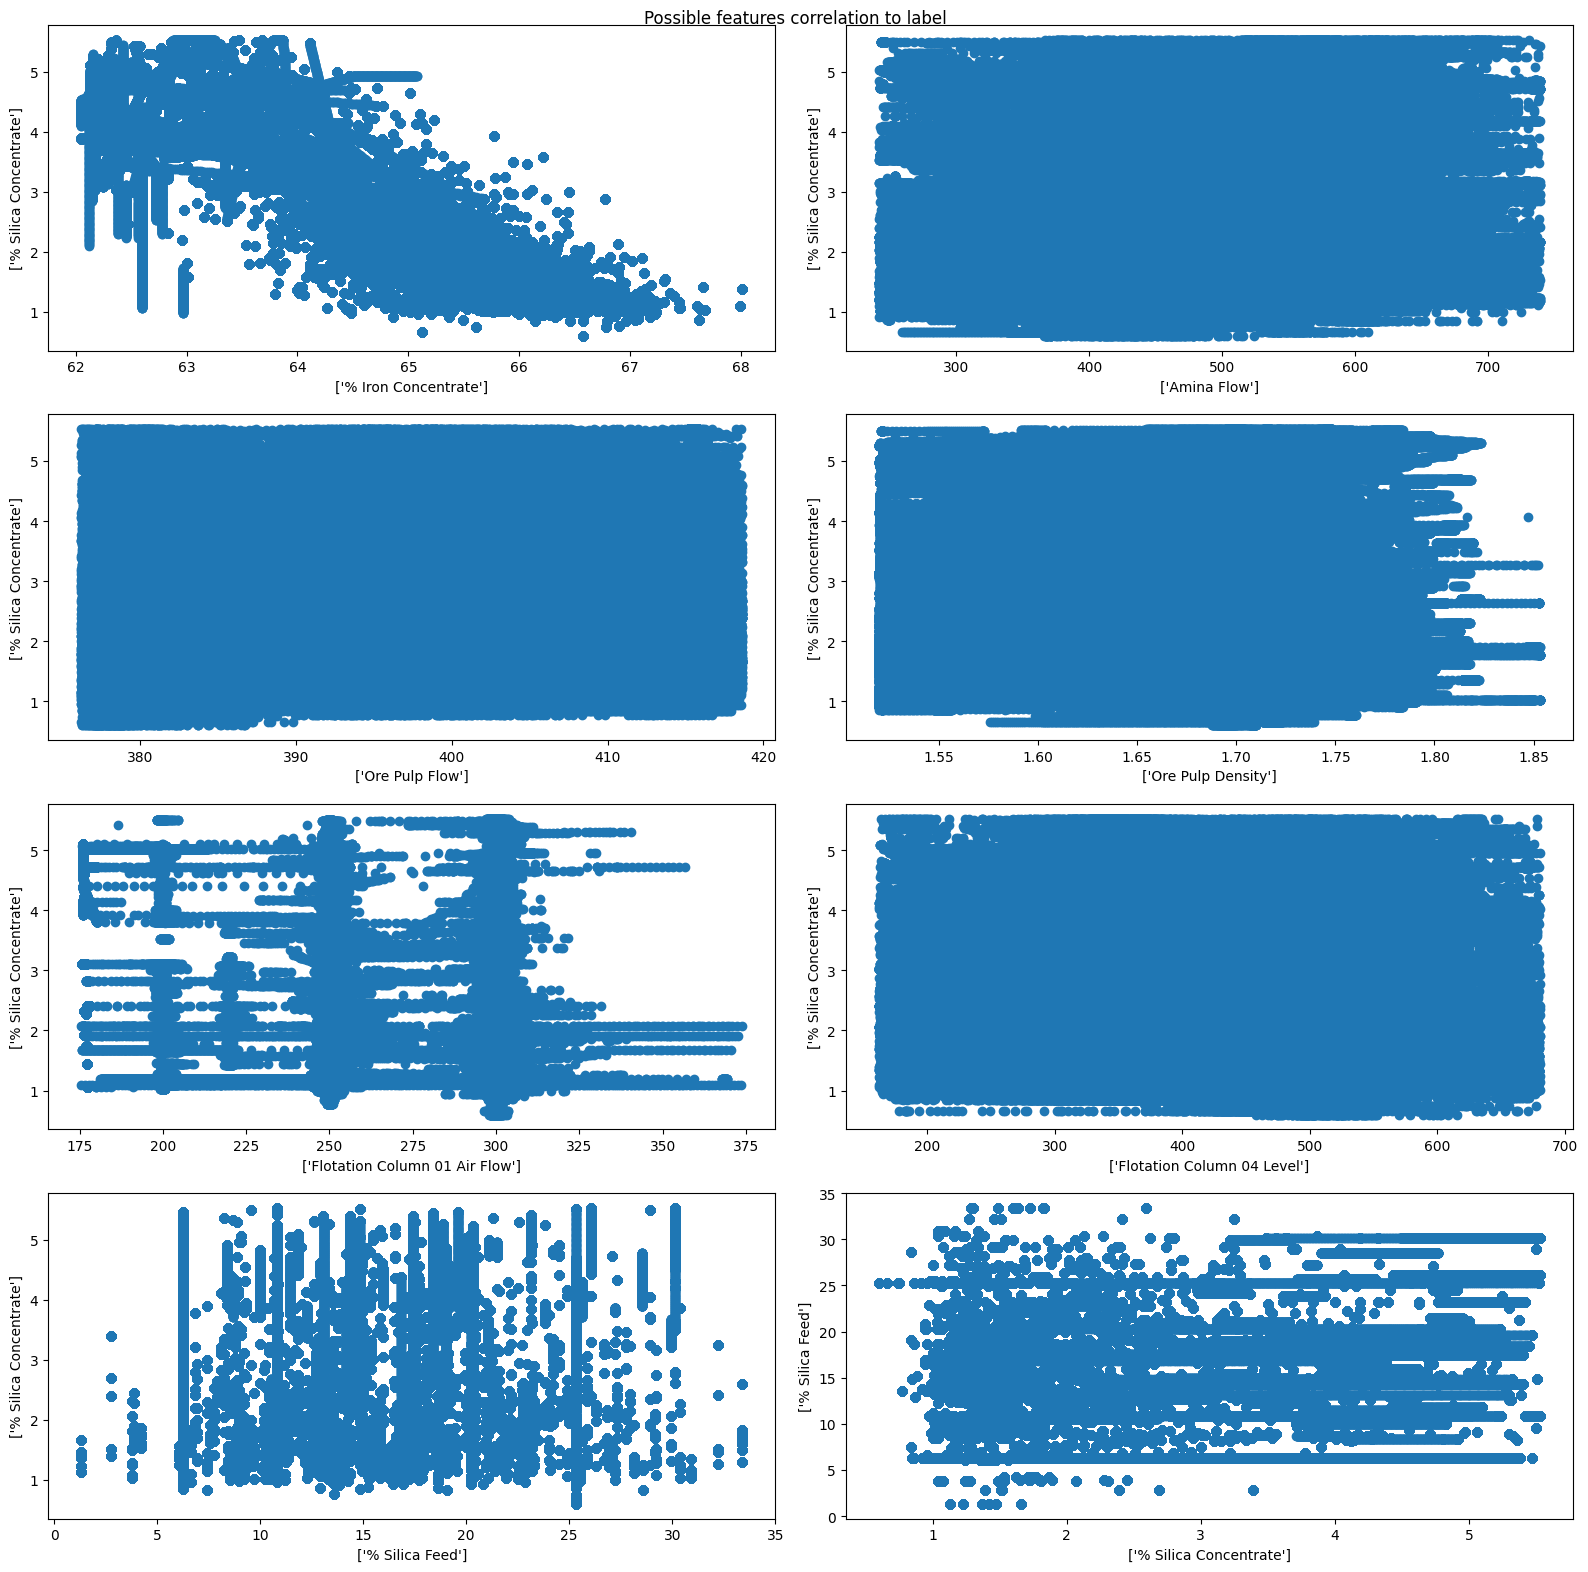

In [12]:
## Feature vs Label Correlation Plot

fig, axs =plt.subplots(4,2,figsize=(16, 16))
fig.suptitle('Possible features correlation to label')


axs[0,0].scatter(data_cl['% Iron Concentrate'],data_cl['% Silica Concentrate'])
axs[0,0].set_xlabel(['% Iron Concentrate'])
axs[0,0].set_ylabel(['% Silica Concentrate'])

axs[0,1].scatter(data_cl['Amina Flow'],data_cl['% Silica Concentrate'])
axs[0,1].set_xlabel(['Amina Flow'])
axs[0,1].set_ylabel(['% Silica Concentrate'])

axs[1,0].scatter(data_cl['Ore Pulp Flow'],data_cl['% Silica Concentrate'])
axs[1,0].set_xlabel(['Ore Pulp Flow'])
axs[1,0].set_ylabel(['% Silica Concentrate'])

axs[1,1].scatter(data_cl['Ore Pulp Density'],data_cl['% Silica Concentrate'])
axs[1,1].set_xlabel(['Ore Pulp Density'])
axs[1,1].set_ylabel(['% Silica Concentrate'])

axs[2,0].scatter(data_cl['Flotation Column 01 Air Flow'],data_cl['% Silica Concentrate'])
axs[2,0].set_xlabel(['Flotation Column 01 Air Flow'])
axs[2,0].set_ylabel(['% Silica Concentrate'])

axs[2,1].scatter(data_cl[ 'Flotation Column 04 Level'],data_cl['% Silica Concentrate'])
axs[2,1].set_xlabel([ 'Flotation Column 04 Level'])
axs[2,1].set_ylabel(['% Silica Concentrate'])


axs[3,0].scatter(data_cl['% Silica Feed'],data_cl['% Silica Concentrate'])
axs[3,0].set_xlabel(['% Silica Feed'])
axs[3,0].set_ylabel(['% Silica Concentrate'])


axs[3,1].scatter(data_cl['% Silica Concentrate'],data_cl['% Silica Feed'])
axs[3,1].set_xlabel(['% Silica Concentrate'])
axs[3,1].set_ylabel(['% Silica Feed'])


plt.tight_layout()


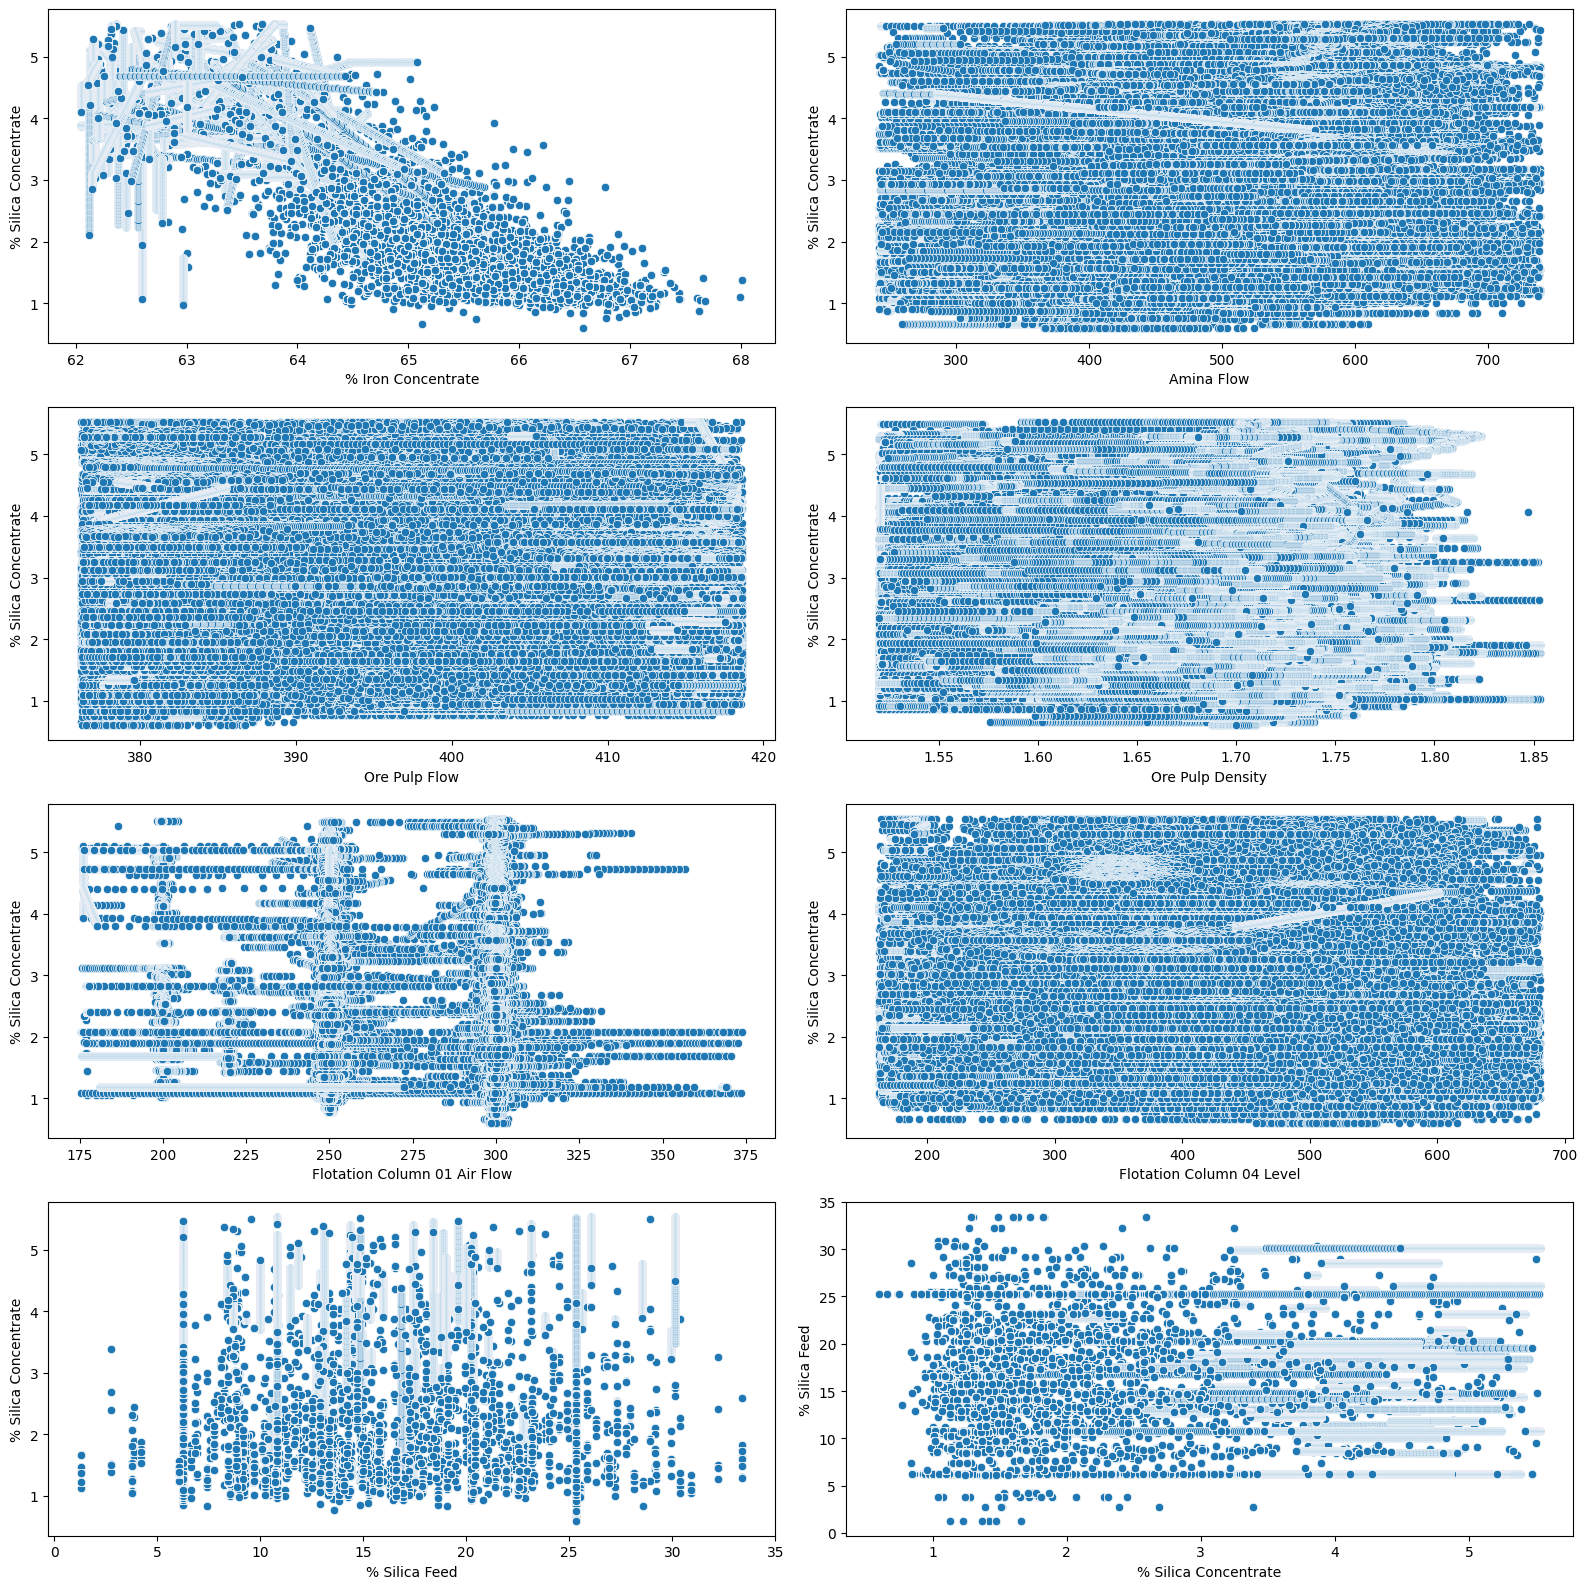

In [14]:
# Improved Plot
# Create a figure and axes
fig, axs = plt.subplots(4, 2, figsize=(16, 16))

# Plot the data
sns.scatterplot(data=data_cl, x="% Iron Concentrate", y="% Silica Concentrate", ax=axs[0, 0])
sns.scatterplot(data=data_cl, x="Amina Flow", y="% Silica Concentrate", ax=axs[0, 1])
sns.scatterplot(data=data_cl, x="Ore Pulp Flow", y="% Silica Concentrate", ax=axs[1, 0])
sns.scatterplot(data=data_cl, x="Ore Pulp Density", y="% Silica Concentrate", ax=axs[1, 1])
sns.scatterplot(data=data_cl, x="Flotation Column 01 Air Flow", y="% Silica Concentrate", ax=axs[2, 0])
sns.scatterplot(data=data_cl, x="Flotation Column 04 Level", y="% Silica Concentrate", ax=axs[2, 1])
sns.scatterplot(data=data_cl, x="% Silica Feed", y="% Silica Concentrate", ax=axs[3, 0])
sns.scatterplot(data=data_cl, x="% Silica Concentrate", y="% Silica Feed", ax=axs[3, 1])

# Set the axis labels
axs[0, 0].set_xlabel('% Iron Concentrate')
axs[0, 0].set_ylabel('% Silica Concentrate')
axs[0, 1].set_xlabel('Amina Flow')
axs[0, 1].set_ylabel('% Silica Concentrate')
axs[1, 0].set_xlabel('Ore Pulp Flow')
axs[1, 0].set_ylabel('% Silica Concentrate')
axs[1, 1].set_xlabel('Ore Pulp Density')
axs[1, 1].set_ylabel('% Silica Concentrate')
axs[2, 0].set_xlabel('Flotation Column 01 Air Flow')
axs[2, 0].set_ylabel('% Silica Concentrate')
axs[2, 1].set_xlabel('Flotation Column 04 Level')
axs[2, 1].set_ylabel('% Silica Concentrate')
axs[3, 0].set_xlabel('% Silica Feed')
axs[3, 0].set_ylabel('% Silica Concentrate')
axs[3, 1].set_xlabel('% Silica Concentrate')
axs[3, 1].set_ylabel('% Silica Feed')

# Tighten the layout
plt.tight_layout()


### Feature Selection

##### The insignificant features such as '% iron feed' will be detrimental to our model so they are removed.

Select only the important features, drop other columns

In [15]:
droplist=['% Iron Feed','Starch Flow',\
          'Ore Pulp pH','Flotation Column 02 Air Flow',\
          'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',\
          'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',\
          'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
          'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 05 Level',
          'Flotation Column 06 Level', 'Flotation Column 07 Level',]

data_cl=data_cl.drop(droplist,axis=1)
data_cl.shape

(737453, 8)

**% Iron concentrate** is an important feature hence, to increase it's impact on the model, we perform feature engineering for % iron concentrate (from x to x^2)

In [16]:
data_cl['% Iron Concentrate_power2']=data_cl['% Iron Concentrate']**2
data_cl

% Silica Feed  Amina Flow  Ore Pulp Flow  Ore Pulp Density  \
0               16.98     557.434        395.713           1.74000   
1               16.98     563.965        397.383           1.74000   
2               16.98     568.054        399.668           1.74000   
3               16.98     568.665        397.939           1.74000   
4               16.98     558.167        400.254           1.74000   
...               ...         ...            ...               ...   
737448          23.20     441.052        386.570           1.65365   
737449          23.20     473.436        384.939           1.65352   
737450          23.20     500.488        383.496           1.65338   
737451          23.20     491.548        384.976           1.65324   
737452          23.20     468.019        384.801           1.65310   

        Flotation Column 01 Air Flow  Flotation Column 04 Level  \
0                            249.214                    443.558   
1                            249.719                    448.086   
2                            249.741                    449.688   
3                            249.917                    446.210   
4                            250.203                    453.670   
...                              ...                        ...   
737448                       302.344                    418.725   
737449                       303.013                    418.377   
737450                       303.662                    419.531   
737451                       302.550                    407.299   
737452                       300.355                    378.969   

        % Iron Concentrate  % Silica Concentrate  % Iron Concentrate_power2  
0                    66.91                  1.31                  4476.9481  
1                    66.91                  1.31                  4476.9481  
2                    66.91                  1.31                  4476.9481  
3                    66.91                  1.31                  4476.9481  
4                    66.91                  1.31                  4476.9481  
...                    ...                   ...                        ...  
737448               64.27                  1.71                  4130.6329  
737449               64.27                  1.71                  4130.6329  
737450               64.27                  1.71                  4130.6329  
737451               64.27                  1.71                  4130.6329  
737452               64.27                  1.71                  4130.6329  

[737453 rows x 9 columns]

## Training & Selection Regression Model

- Linear Regression Model with Regularization Term (Lassso Model)
- Linear Regression Model with Regularization Term (Ridge Model)
- Random Forest Model


In [17]:
data_cl.columns

Index(['% Silica Feed', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 04 Level',
       '% Iron Concentrate', '% Silica Concentrate',
       '% Iron Concentrate_power2'],
      dtype='object')

In [18]:
## Split data to training set and test set

from sklearn.model_selection import train_test_split

X=data_cl.drop('% Silica Concentrate',axis=1)

y=data_cl['% Silica Concentrate']

## Role Number 210107102 => Random state = 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print(y.shape)
print(y_train.shape)
print(y_test.shape)

(737453,)
(589962,)
(147491,)


In [19]:
# normalize the training data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_train_norm,axis=0)}")


Peak to Peak range by column in Raw        X:% Silica Feed                    32.090000
Amina Flow                      497.869000
Ore Pulp Flow                    42.392000
Ore Pulp Density                  0.333402
Flotation Column 01 Air Flow    198.361000
Flotation Column 04 Level       518.158000
% Iron Concentrate                5.960000
% Iron Concentrate_power2       775.157600
dtype: float64
Peak to Peak range by column in Normalized X:[4.71134338 5.45963737 4.37120958 4.81596284 6.69670344 5.64248155
 5.32922122 5.35126705]


In [20]:
# Define Validation Function

from sklearn.model_selection import cross_validate

def model_trainval(model,x,y):

    scoring = ['neg_root_mean_squared_error', 'r2']
    scores = cross_validate(model, x, y, scoring=scoring)
    RMSE = scores['test_neg_root_mean_squared_error'].mean()
    R2 = scores['test_r2'].mean()
    print("Result of Model Validation")
    print(f"RMSE : {RMSE}")
    print(f"R2 :{R2}")

    return RMSE,R2


In [21]:
### Linear Regression Model with Regularization Term (Lassso)

from sklearn.linear_model import Lasso

reg1=Lasso(alpha=0.001)

## Model Training & Cross Validation

[RMSE, R2]=model_trainval(reg1,X_train_norm,y_train)

RMSE_Col=[]
R2_Col=[]

RMSE_Col.append(RMSE)
R2_Col.append(R2)


Result of Model Validation
RMSE : -0.6429980277803624
R2 :0.6732707354866538


In [22]:
### Linear Regression Model with Regularization Term (Ridge Model)

from sklearn.linear_model import Ridge

reg2=Ridge(alpha=0.001)

## Model Training & Cross Validation

[RMSE,R2]=model_trainval(reg2,X_train_norm,y_train)

RMSE_Col.append(RMSE)
R2_Col.append(R2)

Result of Model Validation
RMSE : -0.6342091422225591
R2 :0.682141723894356


In [23]:
### Random Forest Tree Model

from sklearn.ensemble import RandomForestRegressor

reg3=RandomForestRegressor(max_depth=10,n_estimators=10)

## Model Training & Cross Validation

[RMSE,R2]=model_trainval(reg3,X_train_norm,y_train)

RMSE_Col.append(RMSE)
R2_Col.append(R2)

Result of Model Validation
RMSE : -0.4144046141207779
R2 :0.8642747503083339


[Text(0.47630225016015376, 0.9545454545454546, 'x[6] <= -0.555\nsquared_error = 1.266\nsamples = 372866\nvalue = 2.326'),
 Text(0.23158732383087766, 0.8636363636363636, 'x[6] <= -1.109\nsquared_error = 1.013\nsamples = 97666\nvalue = 3.705'),
 Text(0.12020539718129404, 0.7727272727272727, 'x[7] <= -1.351\nsquared_error = 0.695\nsamples = 53902\nvalue = 4.158'),
 Text(0.06786515054452275, 0.6818181818181818, 'x[5] <= 2.45\nsquared_error = 0.601\nsamples = 42487\nvalue = 4.244'),
 Text(0.04039878283151826, 0.5909090909090909, 'x[1] <= 0.72\nsquared_error = 0.598\nsamples = 41101\nvalue = 4.223'),
 Text(0.020499679692504803, 0.5, 'x[0] <= -0.999\nsquared_error = 0.627\nsamples = 28001\nvalue = 4.137'),
 Text(0.010249839846252402, 0.4090909090909091, 'x[5] <= 0.452\nsquared_error = 0.817\nsamples = 5750\nvalue = 3.859'),
 Text(0.005124919923126201, 0.3181818181818182, 'x[6] <= -1.672\nsquared_error = 0.577\nsamples = 4995\nvalue = 3.964'),
 Text(0.0025624599615631004, 0.22727272727272727, 

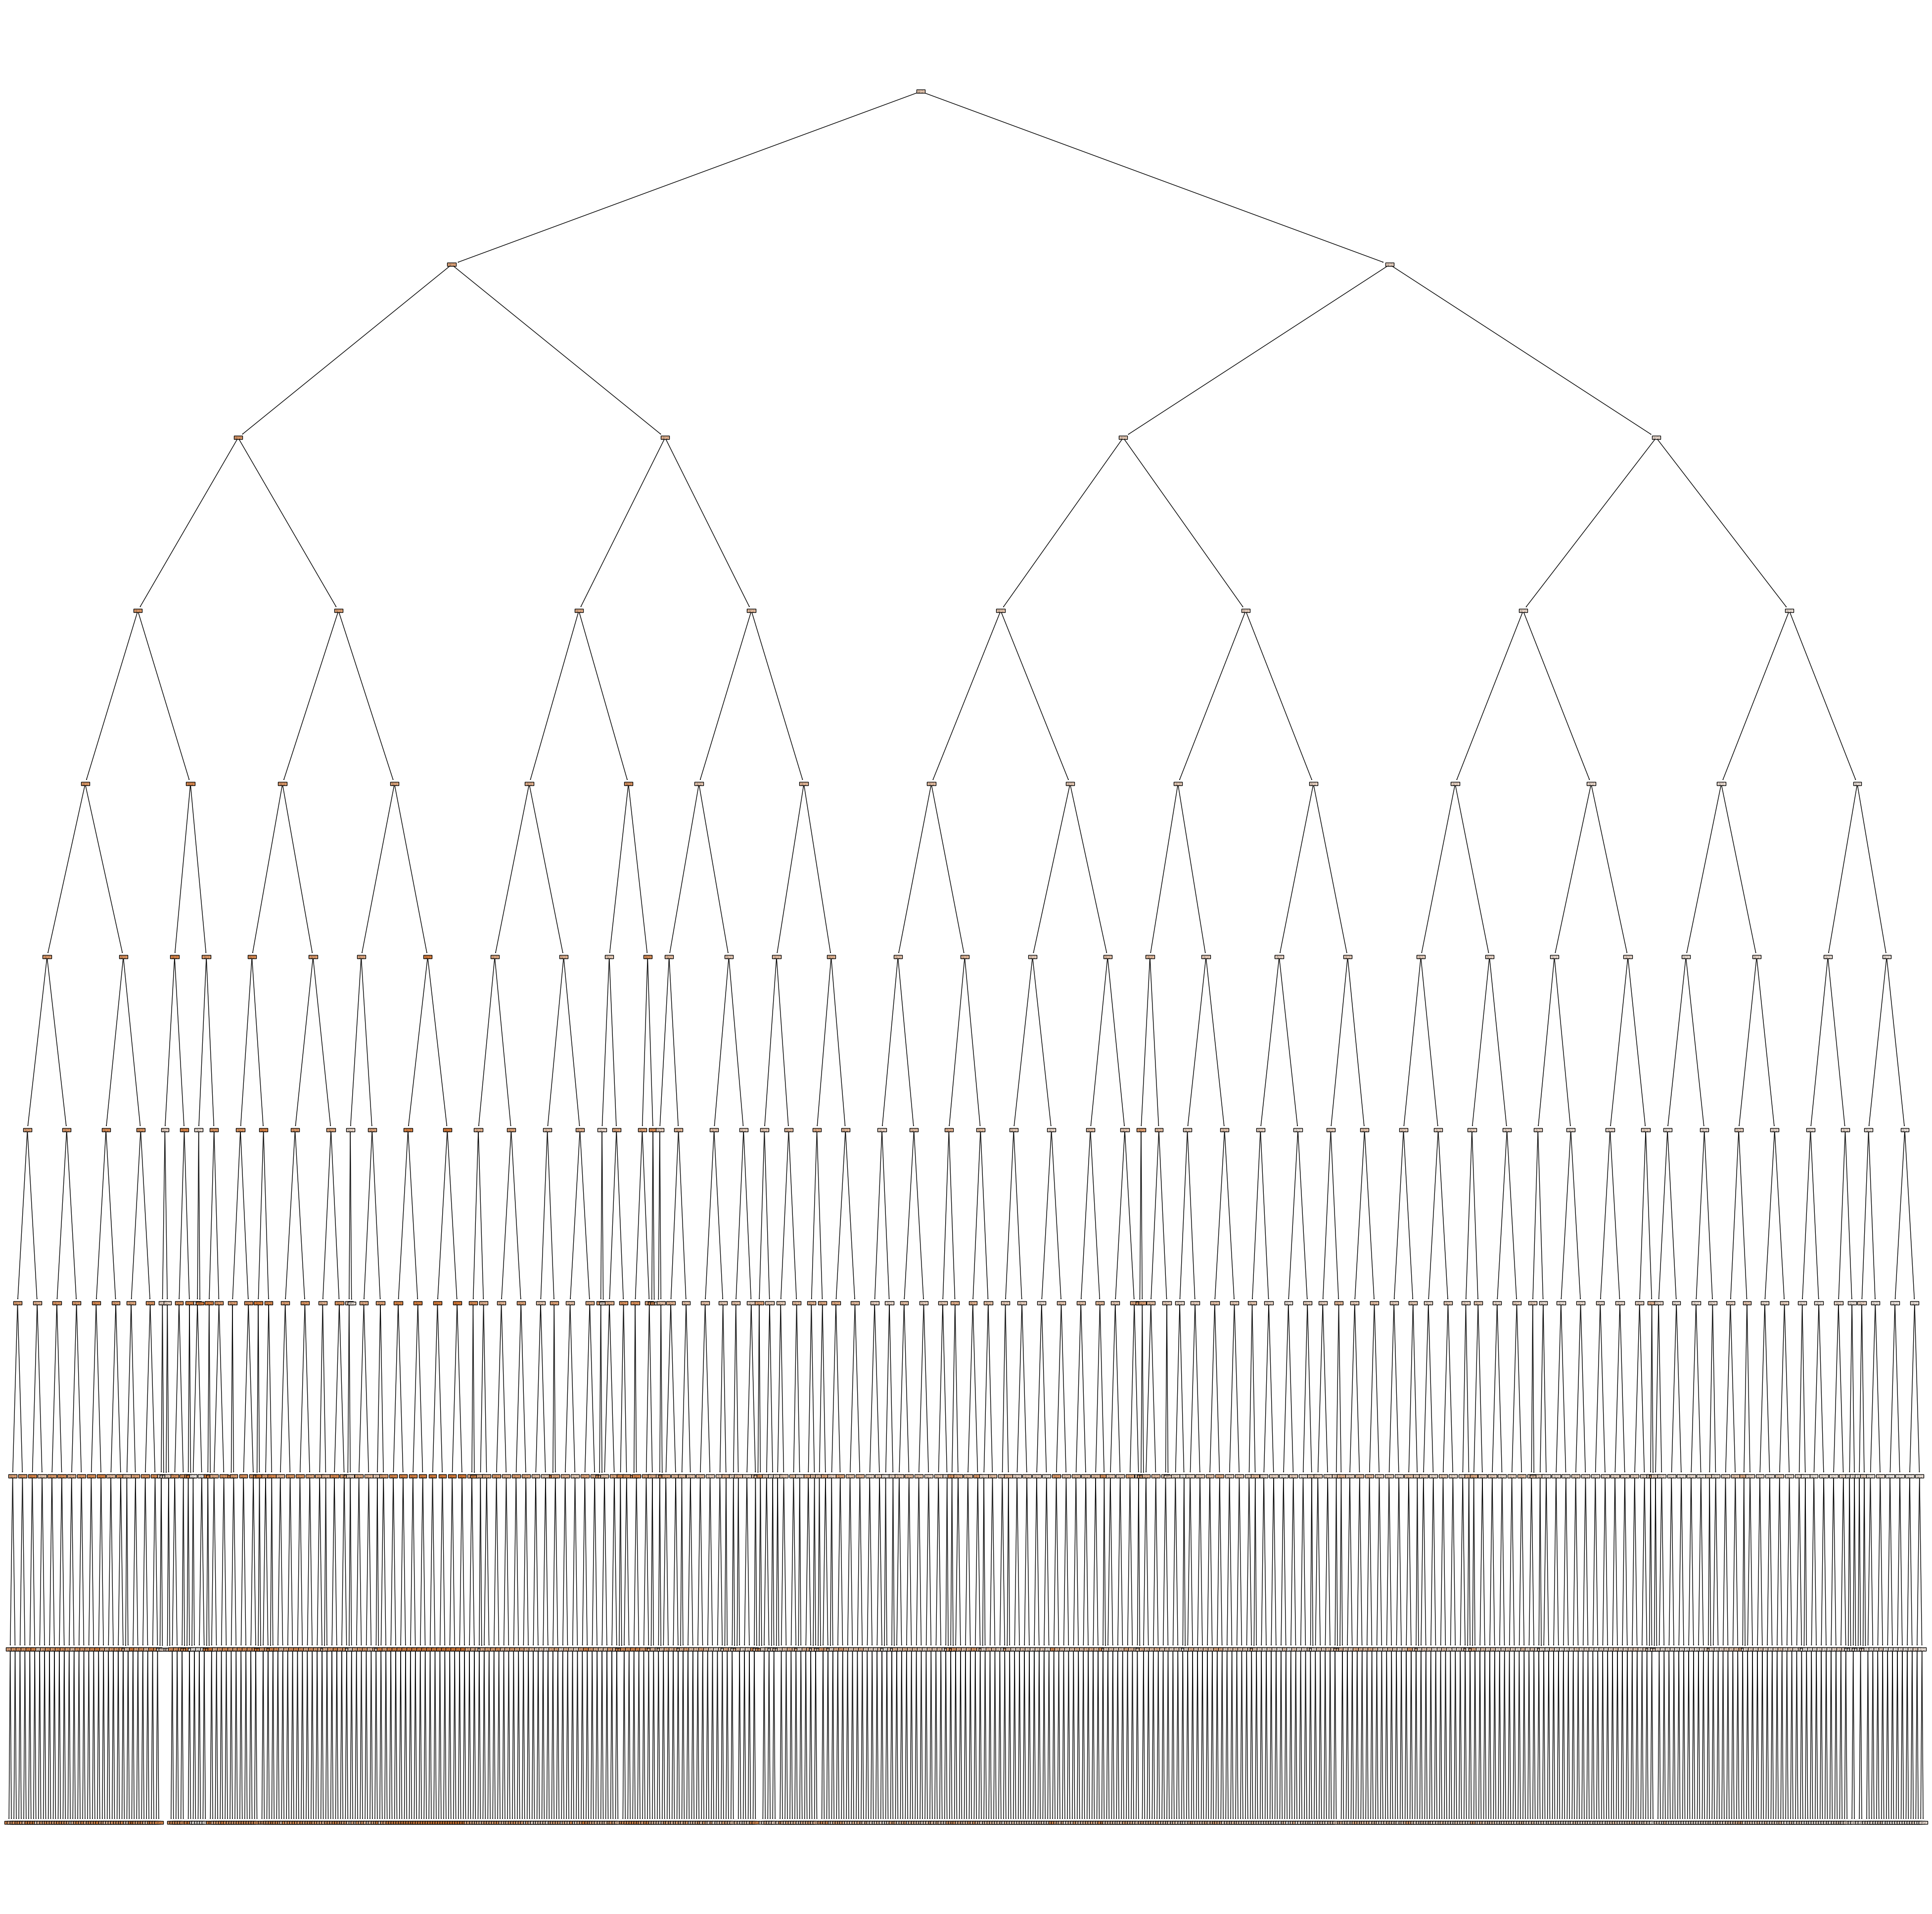

In [24]:
# Tree graphic model

reg3.fit(X_train_norm,y_train)

plt.figure(figsize=(50,50))

from sklearn.tree import plot_tree

plot_tree(reg3.estimators_[0],filled=True)


In [25]:
print(RMSE_Col,R2_Col)

[-0.6429980277803624, -0.6342091422225591, -0.4144046141207779] [0.6732707354866538, 0.682141723894356, 0.8642747503083339]


<function matplotlib.pyplot.show(close=None, block=None)>

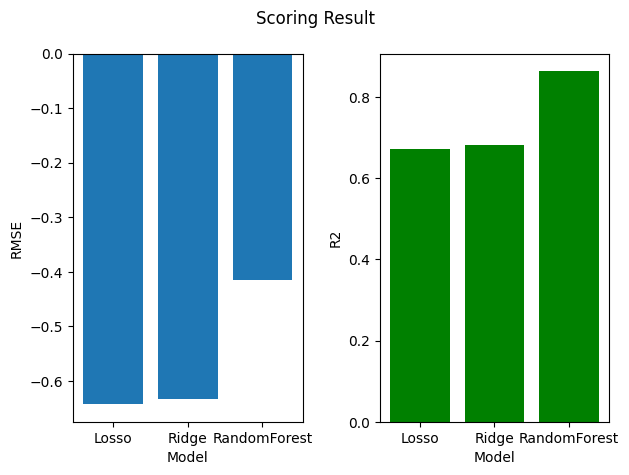

In [26]:
# plot graph performance comparison each pre-selected model

Xgraph=['Losso','Ridge','RandomForest']

fig,axes=plt.subplots(nrows=1,ncols=2)

fig.suptitle("Scoring Result")
axes[0].bar(Xgraph,RMSE_Col)
axes[0].set_xlabel("Model")
axes[0].set_ylabel("RMSE")

axes[1].bar(Xgraph,R2_Col,color='g')
axes[1].set_xlabel("Model")
axes[1].set_ylabel("R2")

plt.tight_layout()
plt.show

### Conclusion: Random Forest model performs better than L1 and L2 regularization models as per RMSE

## Model Testing (before deployment)


In [27]:
# normalize the test data
scaler = StandardScaler()
X_test_norm = scaler.fit_transform(X_test)


## Prediction
y_pred=reg3.predict(X_test_norm)

## Evaluation

from sklearn.metrics import mean_squared_error, r2_score

RMSE_Testing=mean_squared_error(y_test,y_pred)
R2_Testing=r2_score(y_test,y_pred)

print(f"RMSE of test result : {RMSE_Testing} ")
print(f"R2 of test result : {R2_Testing} ")


RMSE of test result : 0.18835285245748232 
R2 of test result : 0.8519919158051652 


In [28]:
#Built Dataframe for test result

result_label=pd.DataFrame()
result_label['% silica concentrate']=y_test
result_label['predicted % silica concentrate']=y_pred

## Project Summarization

- The Random Forest Model is the best prediction model with Root Mean Square error 0.181 wih R Square     0.857

- Comparing performance between Cross-Validation data set and test set. we found that the perfromance does not drop significantly

- The % iron concentrate is still the most important feature because other features do not relate with the target significantly

- Comparison between the predicted % silica concentration and the test set is given below as a table

In [29]:
print(result_label.reset_index().head(50))

     index  % silica concentrate  predicted % silica concentrate
0   555456              5.496654                        5.242909
1    61662              2.260000                        1.992025
2   131442              2.673836                        2.321909
3    39673              3.110000                        3.050457
4   331849              1.060000                        1.322804
5   364593              2.450000                        2.214012
6   173324              2.650000                        2.089383
7   454823              4.730000                        4.729634
8   174178              2.440000                        2.651739
9   281668              0.980000                        1.308830
10  212276              4.940000                        4.277305
11  567608              2.080000                        1.863884
12  501513              1.320000                        1.404372
13  248370              1.290000                        2.522017
14  693592              3

# **Time Series Model Development**

Since the process data was presented as time series, some supervised machine learning models can be applied to generate highly accurate and reliable predictions, using past data as input to train a predictive model.

The model chosen for this project was the Long Short Term Memory Neural Network, or LSTM

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

# Loading the dataset

In [107]:
file_name = 'Data12.csv'
file_url = 'https://drive.google.com/uc?id=1juuU3Q_Ixnc-xPyND7nzdzHWZiFSQDgH'

gdown.download(file_url, file_name, quiet = False)

# Read the CSV file
try:
    data = pd.read_csv(file_name,parse_dates = True, decimal = ',')
except pd.errors.ParserError as e:
    print("Error parsing CSV file:",e)

Downloading...
From (original): https://drive.google.com/uc?id=1juuU3Q_Ixnc-xPyND7nzdzHWZiFSQDgH
From (redirected): https://drive.google.com/uc?id=1juuU3Q_Ixnc-xPyND7nzdzHWZiFSQDgH&confirm=t&uuid=e6e6a476-f493-48dc-a3b7-216bdc30b855
To: /content/Data12.csv
100%|██████████| 184M/184M [00:00<00:00, 214MB/s]


In [ ]:
data.head()

## Data Exploration

In [ ]:
# Check for null values
data.isna().sum()

In [ ]:
data.describe()

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   % Iron Feed                   737453 non-null  float64
 2   % Silica Feed                 737453 non-null  float64
 3   Starch Flow                   737453 non-null  float64
 4   Amina Flow                    737453 non-null  float64
 5   Ore Pulp Flow                 737453 non-null  float64
 6   Ore Pulp pH                   737453 non-null  float64
 7   Ore Pulp Density              737453 non-null  float64
 8   Flotation Column 01 Air Flow  737453 non-null  float64
 9   Flotation Column 02 Air Flow  737453 non-null  float64
 10  Flotation Column 03 Air Flow  737453 non-null  float64
 11  Flotation Column 04 Air Flow  737453 non-null  float64
 12  Flotation Column 05 Air Flow  737453 non-nul

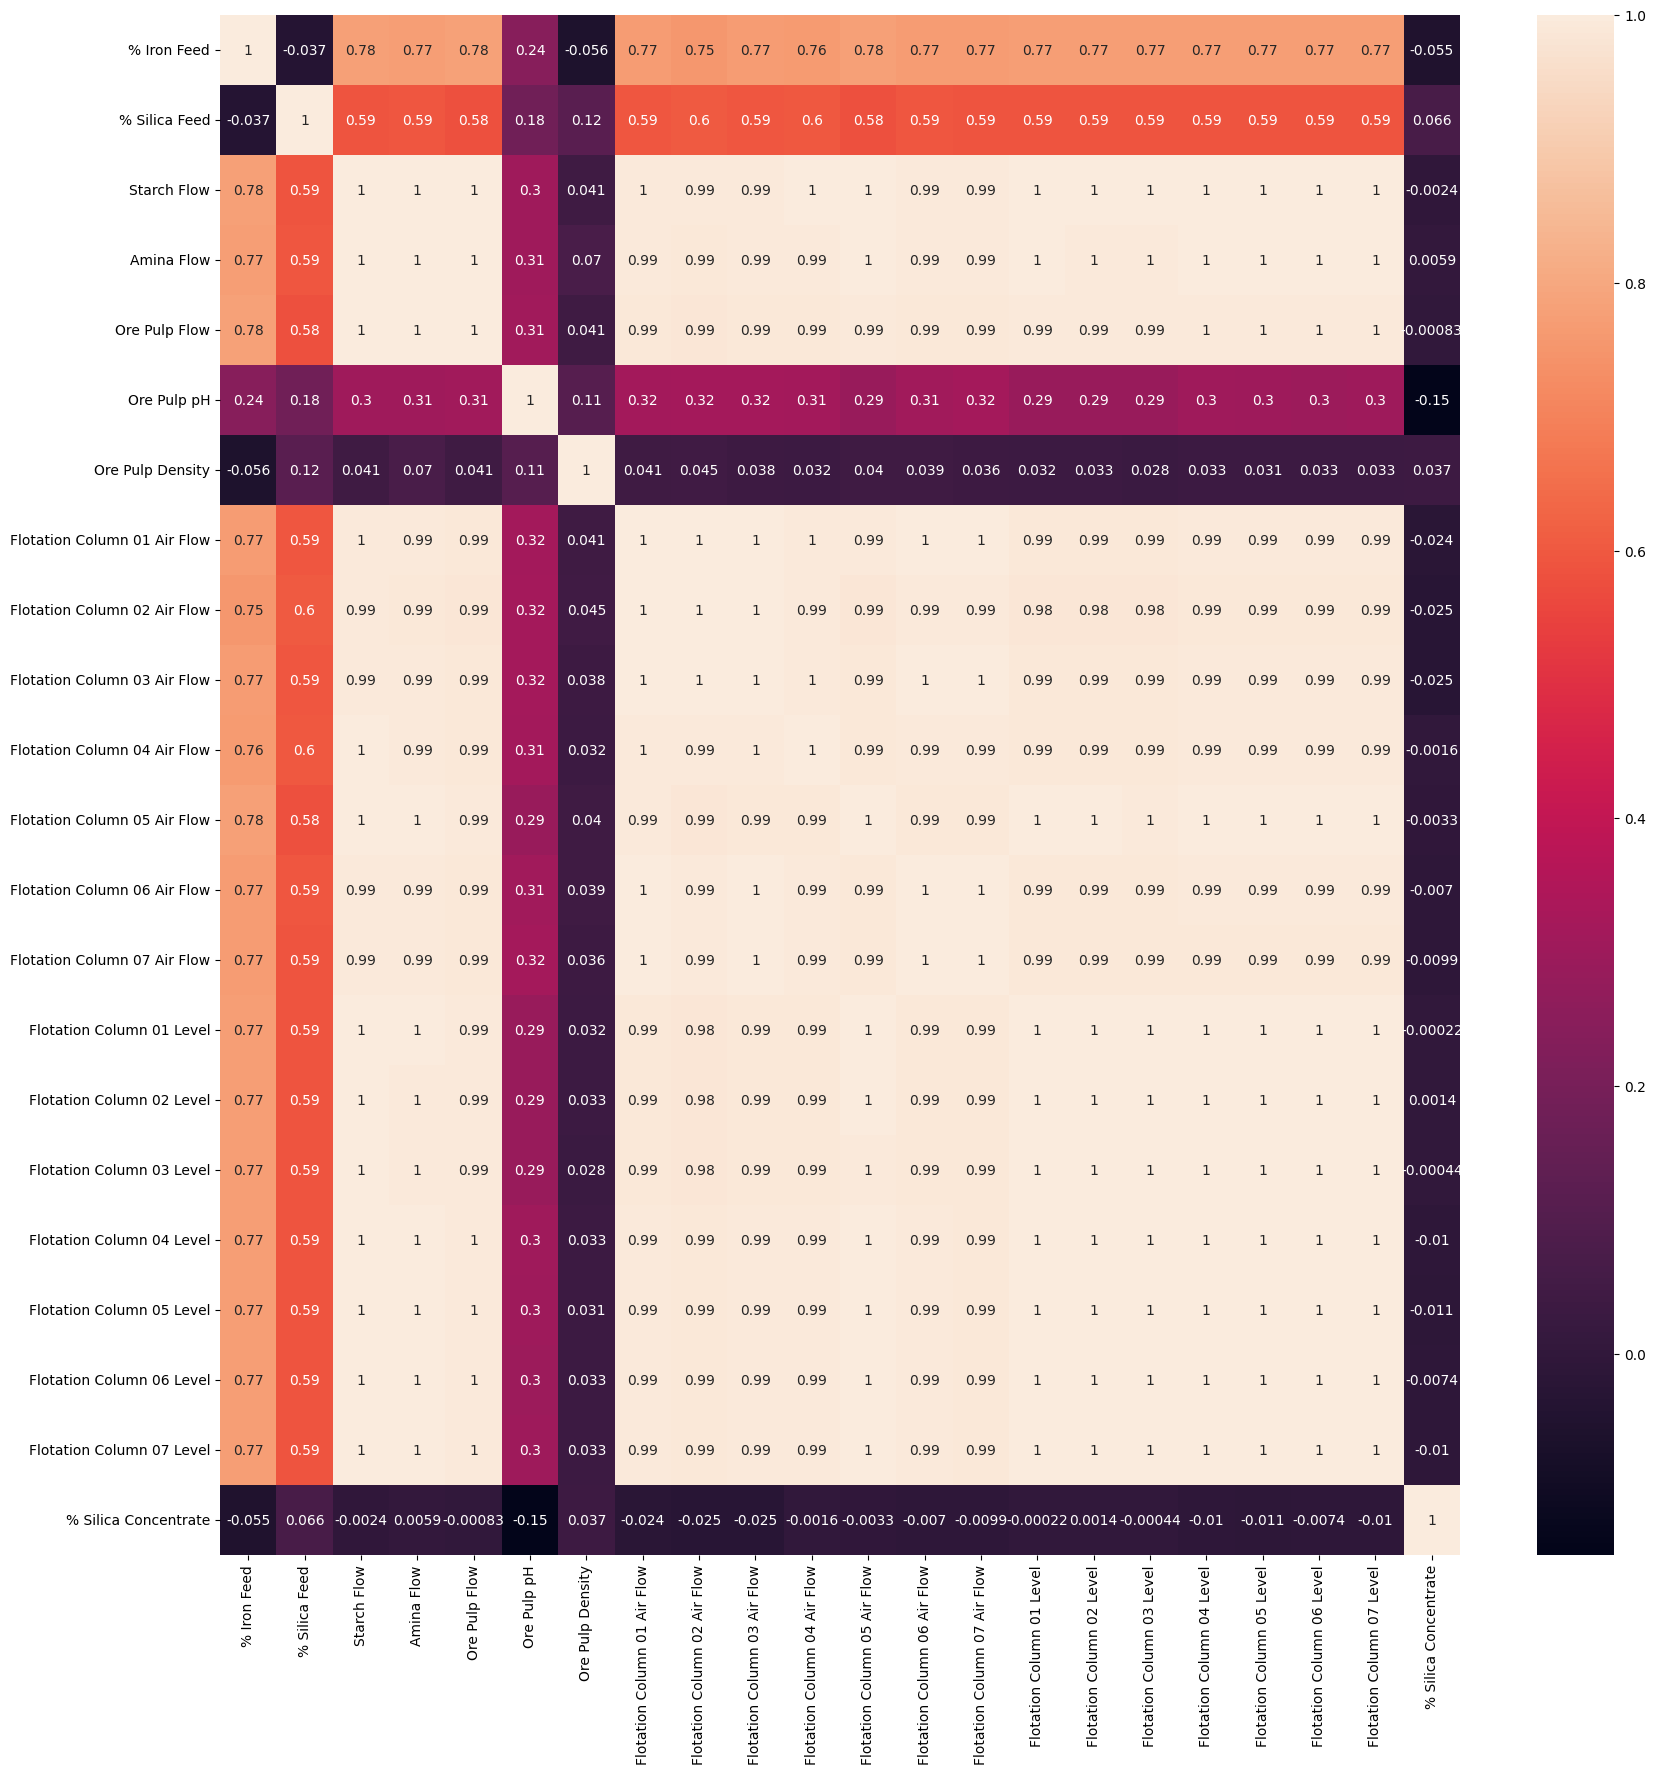

In [142]:
plt.figure(figsize=(20,20))
sn.heatmap(data.corr(), annot=True)
plt.show()

## Data plot of target vs Date over the entire dataset
The target is % Silica Concentrate

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(data['% Silica Concentrate'])
plt.xlabel('Date')
plt.title('Value')

# Data preprocessing

# Reducing analysed data to decrease runtime and improve efficiency
The data is sliced at 27th March 2017 at 12:00:00

The period of removal is one during which the plant was stopped for maintenance, thus ensuring that the data remains continuous and as representative of the actual process as possible.

In [109]:
data = data.set_index('date')

In [110]:
cut_point = "2017-03-27 12:00:00"
cut_date = data.index < cut_point
data.drop(data.index[cut_date], inplace=True)

In [111]:
data.shape

(710639, 23)

## Data plot of target vs Date over the reduced dataset

Text(0.5, 1.0, 'Value')

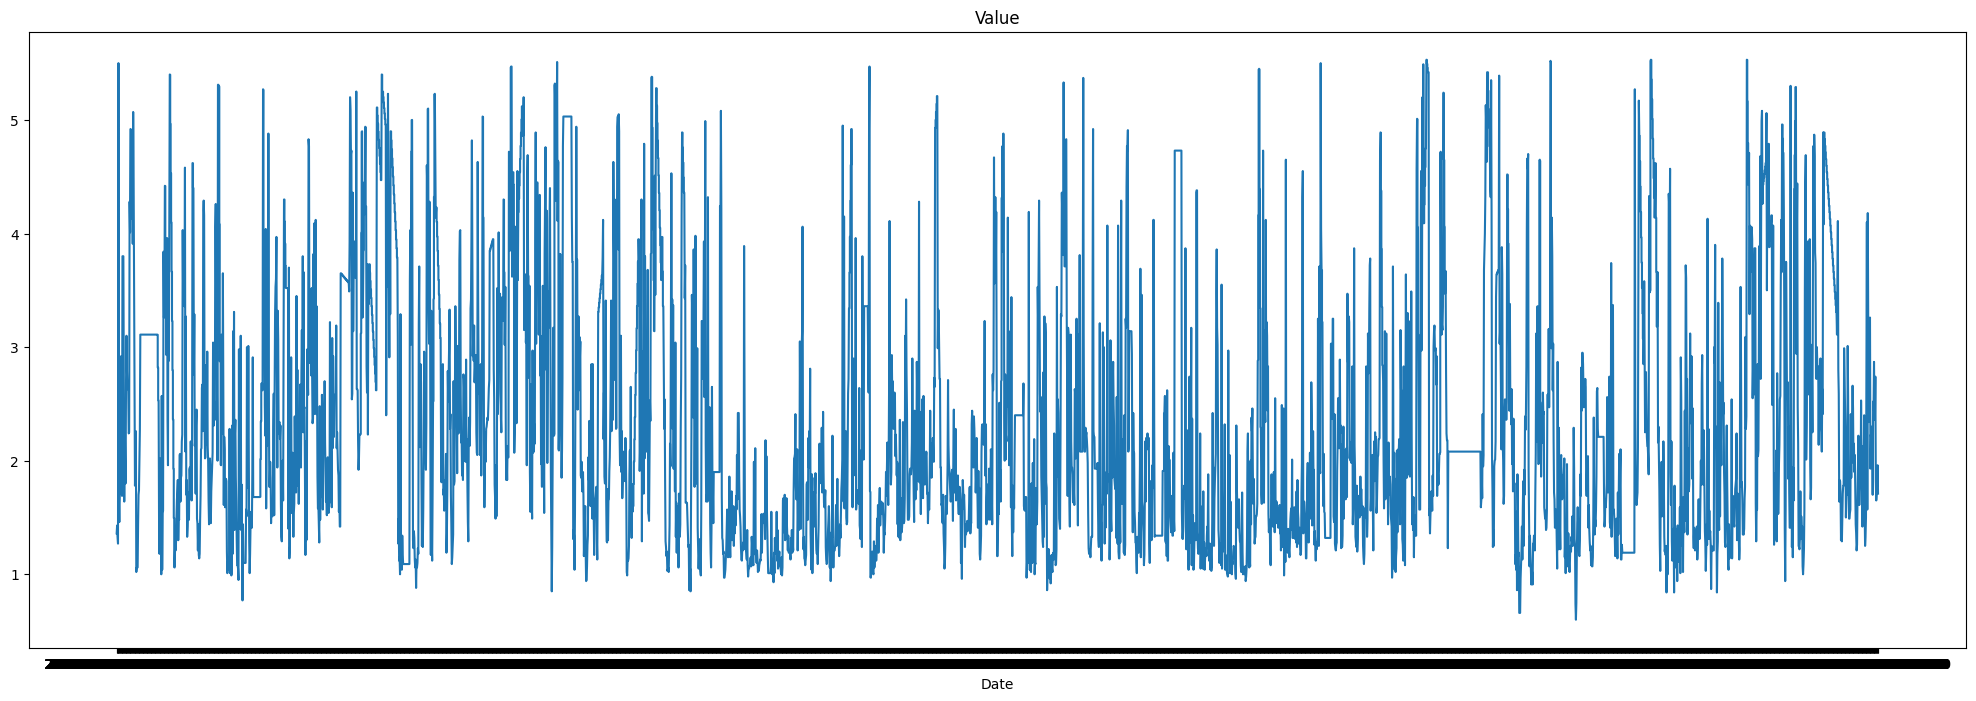

In [112]:
plt.figure(figsize=(25,8))
plt.plot(data['% Silica Concentrate'])
plt.xlabel('Date')
plt.title('Value')

**% Iron Concentrate** and the target **% Silica Concentrate** are highly correlated, since both are the percentage of elements of the same ore obtained in the same chemical analysis. Therefore, the presence of this variable would negatively impact the training of the model, generating biased predictions
Hence this column is dropped

In [114]:
data = data.drop('% Iron Concentrate', axis=1)

In [115]:
data.head()

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date                                                                       
2017-03-29 12:00:00        60.18           9.34      2044.99     349.911   
2017-03-29 12:00:00        60.18           9.34      2020.55     353.064   
2017-03-29 12:00:00        60.18           9.34      2012.84     356.217   
2017-03-29 12:00:00        60.18           9.34      2007.67     359.371   
2017-03-29 12:00:00        60.18           9.34      2003.92     362.524   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date                                                                
2017-03-29 12:00:00        405.625      9.74604          1.649650   
2017-03-29 12:00:00        404.402      9.74169          1.643469   
2017-03-29 12:00:00        403.180      9.73733          1.637289   
2017-03-29 12:00:00        401.957      9.73298          1.631108   
2017-03-29 12:00:00        400.735      9.72862          1.624928   

                     Flotation Column 01 Air Flow  \
date                                                
2017-03-29 12:00:00                       200.393   
2017-03-29 12:00:00                       200.131   
2017-03-29 12:00:00                       199.869   
2017-03-29 12:00:00                       199.607   
2017-03-29 12:00:00                       199.345   

                     Flotation Column 02 Air Flow  \
date                                                
2017-03-29 12:00:00                       195.734   
2017-03-29 12:00:00                       196.476   
2017-03-29 12:00:00                       197.219   
2017-03-29 12:00:00                       197.961   
2017-03-29 12:00:00                       198.703   

                     Flotation Column 03 Air Flow  ...  \
date                                               ...   
2017-03-29 12:00:00                       201.826  ...   
2017-03-29 12:00:00                       200.909  ...   
2017-03-29 12:00:00                       199.992  ...   
2017-03-29 12:00:00                       199.075  ...   
2017-03-29 12:00:00                       198.158  ...   

                     Flotation Column 06 Air Flow  \
date                                                
2017-03-29 12:00:00                       250.601   
2017-03-29 12:00:00                       250.208   
2017-03-29 12:00:00                       249.815   
2017-03-29 12:00:00                       249.422   
2017-03-29 12:00:00                       249.029   

                     Flotation Column 07 Air Flow  Flotation Column 01 Level  \
date                                                                           
2017-03-29 12:00:00                       251.002                 555.264467   
2017-03-29 12:00:00                       250.828                 557.839933   
2017-03-29 12:00:00                       250.653                 560.415400   
2017-03-29 12:00:00                       250.478                 562.990867   
2017-03-29 12:00:00                       250.304                 565.566333   

                     Flotation Column 02 Level  Flotation Column 03 Level  \
date                                                                        
2017-03-29 12:00:00                 552.255566                 614.984714   
2017-03-29 12:00:00                 554.531131                 659.557429   
2017-03-29 12:00:00                 556.806697                 704.130143   
2017-03-29 12:00:00                 559.082262                 748.702857   
2017-03-29 12:00:00                 561.357828                 793.275571   

                     Flotation Column 04 Level  Flotation Column 05 Level  \
date                                                                        
2017-03-29 12:00:00                    428.430                    413.662   
2017-03-29 12:00:00                    431.146                    422.308   
2017-03-29 12:00:00                    433.863                    430.95

In [116]:
data = data.reset_index() # Index is reset to have date as a column

In [117]:
data.head()

date  % Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
0  2017-03-29 12:00:00        60.18           9.34      2044.99     349.911   
1  2017-03-29 12:00:00        60.18           9.34      2020.55     353.064   
2  2017-03-29 12:00:00        60.18           9.34      2012.84     356.217   
3  2017-03-29 12:00:00        60.18           9.34      2007.67     359.371   
4  2017-03-29 12:00:00        60.18           9.34      2003.92     362.524   

   Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
0        405.625      9.74604          1.649650                       200.393   
1        404.402      9.74169          1.643469                       200.131   
2        403.180      9.73733          1.637289                       199.869   
3        401.957      9.73298          1.631108                       199.607   
4        400.735      9.72862          1.624928                       199.345   

   Flotation Column 02 Air Flow  ...  Flotation Column 06 Air Flow  \
0                       195.734  ...                       250.601   
1                       196.476  ...                       250.208   
2                       197.219  ...                       249.815   
3                       197.961  ...                       249.422   
4                       198.703  ...                       249.029   

   Flotation Column 07 Air Flow  Flotation Column 01 Level  \
0                       251.002                 555.264467   
1                       250.828                 557.839933   
2                       250.653                 560.415400   
3                       250.478                 562.990867   
4                       250.304                 565.566333   

   Flotation Column 02 Level  Flotation Column 03 Level  \
0                 552.255566                 614.984714   
1                 554.531131                 659.557429   
2                 556.806697                 704.130143   
3                 559.082262                 748.702857   
4                 561.357828                 793.275571   

   Flotation Column 04 Level  Flotation Column 05 Level  \
0                    428.430                    413.662   
1                    431.146                    422.308   
2                    433.863                    430.954   
3                    436.580                    439.600   
4                    439.296                    448.246   

   Flotation Column 06 Level  Flotation Column 07 Level  % Silica Concentrate  
0                    447.887                    464.869                  1.36  
1                    444.326                    463.224                  1.36  
2                    440.765                    461.579                  1.36  
3                    437.204                    459.935                  1.36  
4                    433.643                    458.290                  1.36  

[5 rows x 23 columns]

### The grouping of the data considerably reduced the volume of the dataset and the subsequent computational cost of training.


### This operation was performed because each input sample represents a measurement referring to 20 seconds of process, while the output variable remains constant and only changes every two hours, which is the period of time needed to calculate its new value in the lab.

Thus, a grouping was performed using the median of each 30 samples, obtaining a new dataset in which **each sample** now represents **10 minutes** of process.

In [118]:
data['date'] = pd.to_datetime(data['date'])
data = data.groupby(data.index//30).median()
data.shape

(23688, 23)

In [119]:
data.head()

date  % Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
0 2017-03-29 12:00:00        60.18           9.34  1998.300000    375.7900   
1 2017-03-29 12:00:00        60.18           9.34   887.061094    407.4405   
2 2017-03-29 12:00:00        60.18           9.34   533.597437    424.8995   
3 2017-03-29 12:00:00        60.18           9.34  1519.712482    416.7245   
4 2017-03-29 12:00:00        60.18           9.34   349.012220    344.8150   

   Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
0     400.689500     9.682895          1.560033                      200.1990   
1     398.847500     9.568095          1.555570                      200.1245   
2     398.398000     9.459190          1.577445                      199.9510   
3     398.182643     9.417755          1.556550                      200.1100   
4     408.161706     9.453900          1.526116                      199.9360   

   Flotation Column 02 Air Flow  ...  Flotation Column 06 Air Flow  \
0                      196.3045  ...                      250.1970   
1                      194.3155  ...                      250.0595   
2                      196.4225  ...                      249.9715   
3                      195.8355  ...                      250.0925   
4                      196.1735  ...                      250.0345   

   Flotation Column 07 Air Flow  Flotation Column 01 Level  \
0                      250.1590                 592.608733   
1                      250.1775                 669.872733   
2                      249.2290                 747.136733   
3                      249.9780                 824.400733   
4                      250.0495                 851.526045   

   Flotation Column 02 Level  Flotation Column 03 Level  \
0                 585.251266                 882.280333   
1                 653.518234                 884.558716   
2                 721.785201                 885.623658   
3                 790.052168                 879.846763   
4                 812.198130                 836.375932   

   Flotation Column 04 Level  Flotation Column 05 Level  \
0                   444.5595                   454.9320   
1                   457.6375                   449.1090   
2                   441.2990                   451.8935   
3                   459.9630                   456.5755   
4                   615.0905                   580.5915   

   Flotation Column 06 Level  Flotation Column 07 Level  % Silica Concentrate  
0                   448.7880                   460.0055                  1.36  
1                   460.8230                   453.1655                  1.36  
2                   452.1615                   449.3950                  1.36  
3                   468.7775                   458.0650                  1.36  
4                   569.4130                   582.5209                  1.36  

[5 rows x 23 columns]

In [125]:
data = data.drop('date', axis=1)

## Splitting the training and Testing Data

In [126]:
data_training = data.iloc[:16582,:]
data_validation = data.iloc[16583:,:]

print(data_training.shape)
print(data_validation.shape)

(16582, 22)
(7105, 22)


## Scaling

In [127]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

In [128]:
entry_variables = ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow',	'Flotation Column 04 Air Flow',	'Flotation Column 05 Air Flow',	'Flotation Column 06 Air Flow',	'Flotation Column 07 Air Flow',	'Flotation Column 01 Level',	'Flotation Column 02 Level',	'Flotation Column 03 Level', 'Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level']

x_transformer = scaler
x_transformer = scaler.fit(data_training[entry_variables].to_numpy())

data_training.loc[:, entry_variables] = x_transformer.transform(data_training[entry_variables].to_numpy())
data_validation.loc[:, entry_variables] = x_transformer.transform(data_validation[entry_variables].to_numpy())

<ipython-input-128-e0f3cd364463>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_training.loc[:, entry_variables] = x_transformer.transform(data_training[entry_variables].to_numpy())
<ipython-input-128-e0f3cd364463>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_validation.loc[:, entry_variables] = x_transformer.transform(data_validation[entry_variables].to_numpy())


In [129]:
y_transformer = scaler
y_transformer = y_transformer.fit(data_training[['% Silica Concentrate']])

data_training['% Silica Concentrate'] = y_transformer.transform(data_training[['% Silica Concentrate']])
data_validation['% Silica Concentrate'] = y_transformer.transform(data_validation[['% Silica Concentrate']])

<ipython-input-129-4135e751a2dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_training['% Silica Concentrate'] = y_transformer.transform(data_training[['% Silica Concentrate']])
<ipython-input-129-4135e751a2dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_validation['% Silica Concentrate'] = y_transformer.transform(data_validation[['% Silica Concentrate']])


In [130]:
data_training.head(5)

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  Ore Pulp Flow  \
0     0.796305       0.193446     0.316589    0.269615       0.571685   
1     0.796305       0.193446     0.139617    0.333256       0.527541   
2     0.796305       0.193446     0.083326    0.368362       0.516768   
3     0.796305       0.193446     0.240371    0.351924       0.511607   
4     0.796305       0.193446     0.053930    0.207333       0.750759   

   Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
0     0.452402          0.120699                      0.131280   
1     0.396516          0.107299                      0.130879   
2     0.343501          0.172977                      0.129946   
3     0.323330          0.110241                      0.130801   
4     0.340926          0.018865                      0.129865   

   Flotation Column 02 Air Flow  Flotation Column 03 Air Flow  ...  \
0                      0.144075                      0.135120  ...   
1                      0.129366                      0.133982  ...   
2                      0.144947                      0.137220  ...   
3                      0.140607                      0.134192  ...   
4                      0.143106                      0.132437  ...   

   Flotation Column 06 Air Flow  Flotation Column 07 Air Flow  \
0                      0.353228                      0.391099   
1                      0.352379                      0.391230   
2                      0.351836                      0.384524   
3                      0.352583                      0.389819   
4                      0.352225                      0.390325   

   Flotation Column 01 Level  Flotation Column 02 Level  \
0                   0.621526                   0.604541   
1                   0.730151                   0.715543   
2                   0.838777                   0.826545   
3                   0.947402                   0.937547   
4                   0.985538                   0.973557   

   Flotation Column 03 Level  Flotation Column 04 Level  \
0                   0.994064                   0.545830   
1                   0.997063                   0.571152   
2                   0.998464                   0.539517   
3                   0.990861                   0.575655   
4                   0.933651                   0.876022   

   Flotation Column 05 Level  Flotation Column 06 Level  \
0                   0.563795                   0.533722   
1                   0.552248                   0.556185   
2                   0.557770                   0.540019   
3                   0.567054                   0.571031   
4                   0.812978                   0.758858   

   Flotation Column 07 Level  % Silica Concentrate  
0                   0.585811              0.124473  
1                   0.571583              0.124473  
2                   0.563740              0.124473  
3                   0.581775              0.124473  
4                   0.840658              0.124473  

[5 rows x 22 columns]

LSTM needs the entry data to be dimensioned as a 3-D matrix composed of the input data, the size of past memory provided (or timesteps) and the output data for this period. Below is the function used for creation of the input matrix and selection of the size of the desired timesteps.

In [131]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []

    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

The selected timestep is 36, which means that 36 past samples (including the output), which represent 6 hours of processing, were used to predict the next sample

In [132]:
time_steps = 36

x_train, y_train = create_dataset(data_training, data_training['% Silica Concentrate'], time_steps)
x_test, y_test = create_dataset(data_validation, data_validation['% Silica Concentrate'], time_steps)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(16546, 36, 22) (16546,)
(7069, 36, 22) (7069,)


## Model Building

In [133]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(
    LSTM(24, input_shape=(x_train.shape[1], x_train.shape[2]))
)
model.add(Dense(1))
model.add(Dropout(rate=0.2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 24)                4512      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
 dropout_2 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 4537 (17.72 KB)
Trainable params: 4537 (17.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Callback function to prevent overfitting

In [134]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='loss', patience=10)

In [135]:
model.fit(x_train, y_train, epochs=20, batch_size=32, shuffle=False, callbacks=[callback])

Epoch 1/20
518/518 [==============================] - 11s 17ms/step - loss: 0.0594 - acc: 6.6481e-04
Epoch 2/20
518/518 [==============================] - 8s 16ms/step - loss: 0.0402 - acc: 6.6481e-04
Epoch 3/20
518/518 [==============================] - 8s 15ms/step - loss: 0.0376 - acc: 7.2525e-04
Epoch 4/20
518/518 [==============================] - 9s 17ms/step - loss: 0.0364 - acc: 6.0438e-04
Epoch 5/20
518/518 [==============================] - 7s 14ms/step - loss: 0.0370 - acc: 7.2525e-04
Epoch 6/20
518/518 [==============================] - 9s 17ms/step - loss: 0.0360 - acc: 6.0438e-04
Epoch 7/20
518/518 [==============================] - 8s 15ms/step - loss: 0.0353 - acc: 7.2525e-04
Epoch 8/20
518/518 [==============================] - 9s 18ms/step - loss: 0.0354 - acc: 6.6481e-04
Epoch 9/20
518/518 [==============================] - 11s 20ms/step - loss: 0.0346 - acc: 7.2525e-04
Epoch 10/20
518/518 [==============================] - 7s 14ms/step - loss: 0.0354 - acc: 7.2525e-

In [136]:
y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)

221/221 [==============================] - 1s 5ms/step


## Evaluation of the model

In [137]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [138]:
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_predict_train))
print('Training RMSE:', rmse_train)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predict_test))
print('Validation RMSE:', rmse)

r2 = r2_score(y_test, y_predict_test)
print('Validation R2:', r2)

Training RMSE: 0.119620584
Validation RMSE: 0.12633525
Validation R2: 0.7232517398121294


## Comaprison plots

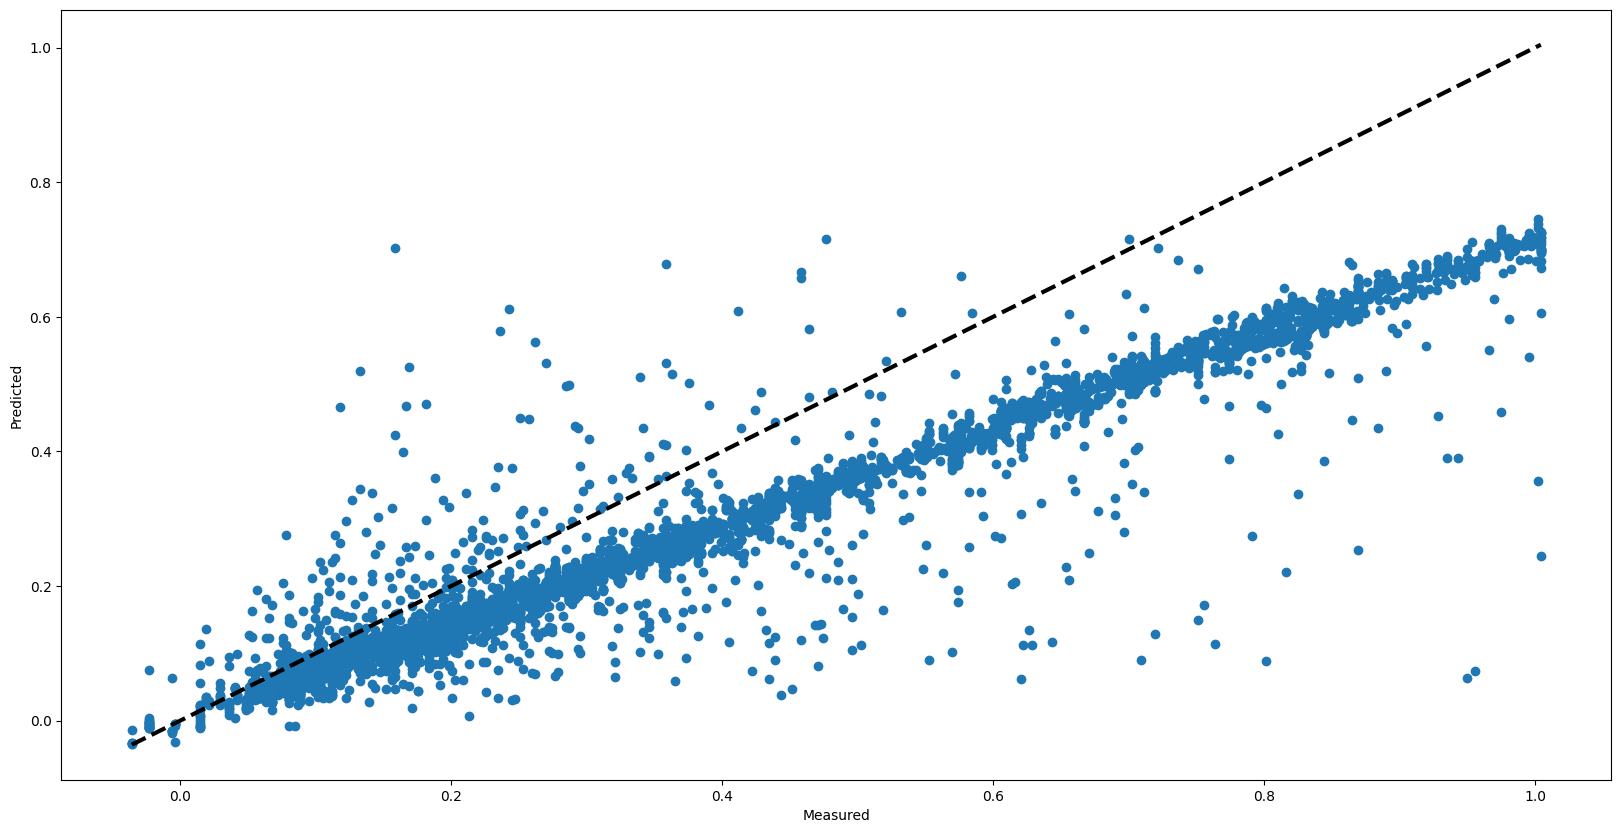

In [139]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(y_test, y_predict_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### In this graph, we notice that there is a bias in the prediction of higher values, as seen in the deviation from the control line

Text(0.5, 1.0, 'Real')

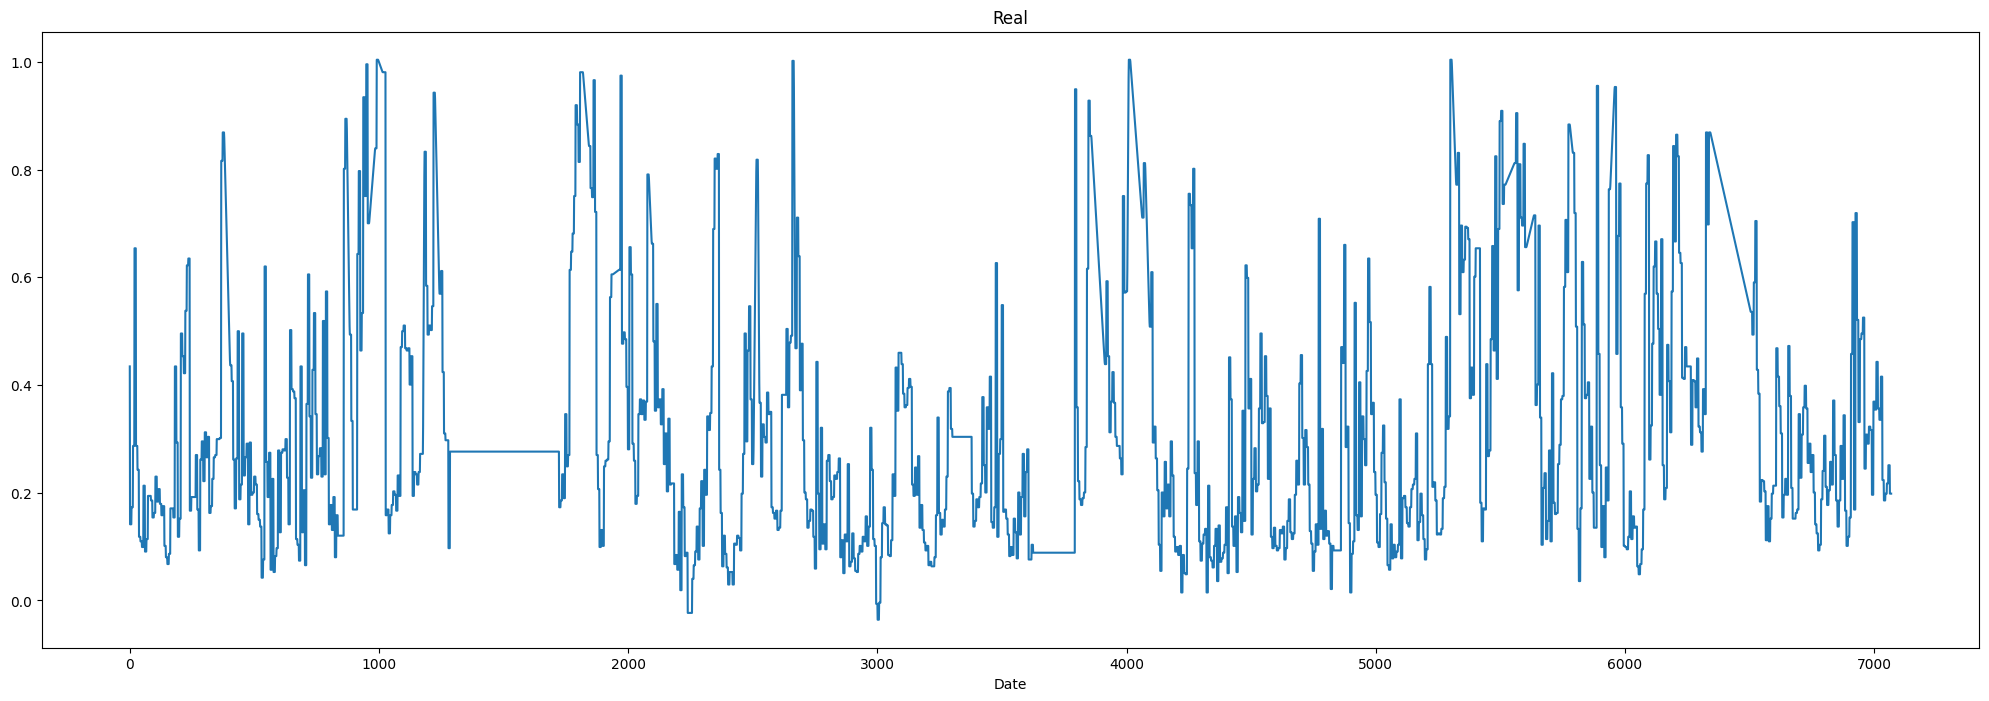

In [140]:
plt.figure(figsize=(25,8))
plt.plot(y_test)
plt.xlabel('Date')
plt.title('Real')

Text(0.5, 1.0, 'Predicted')

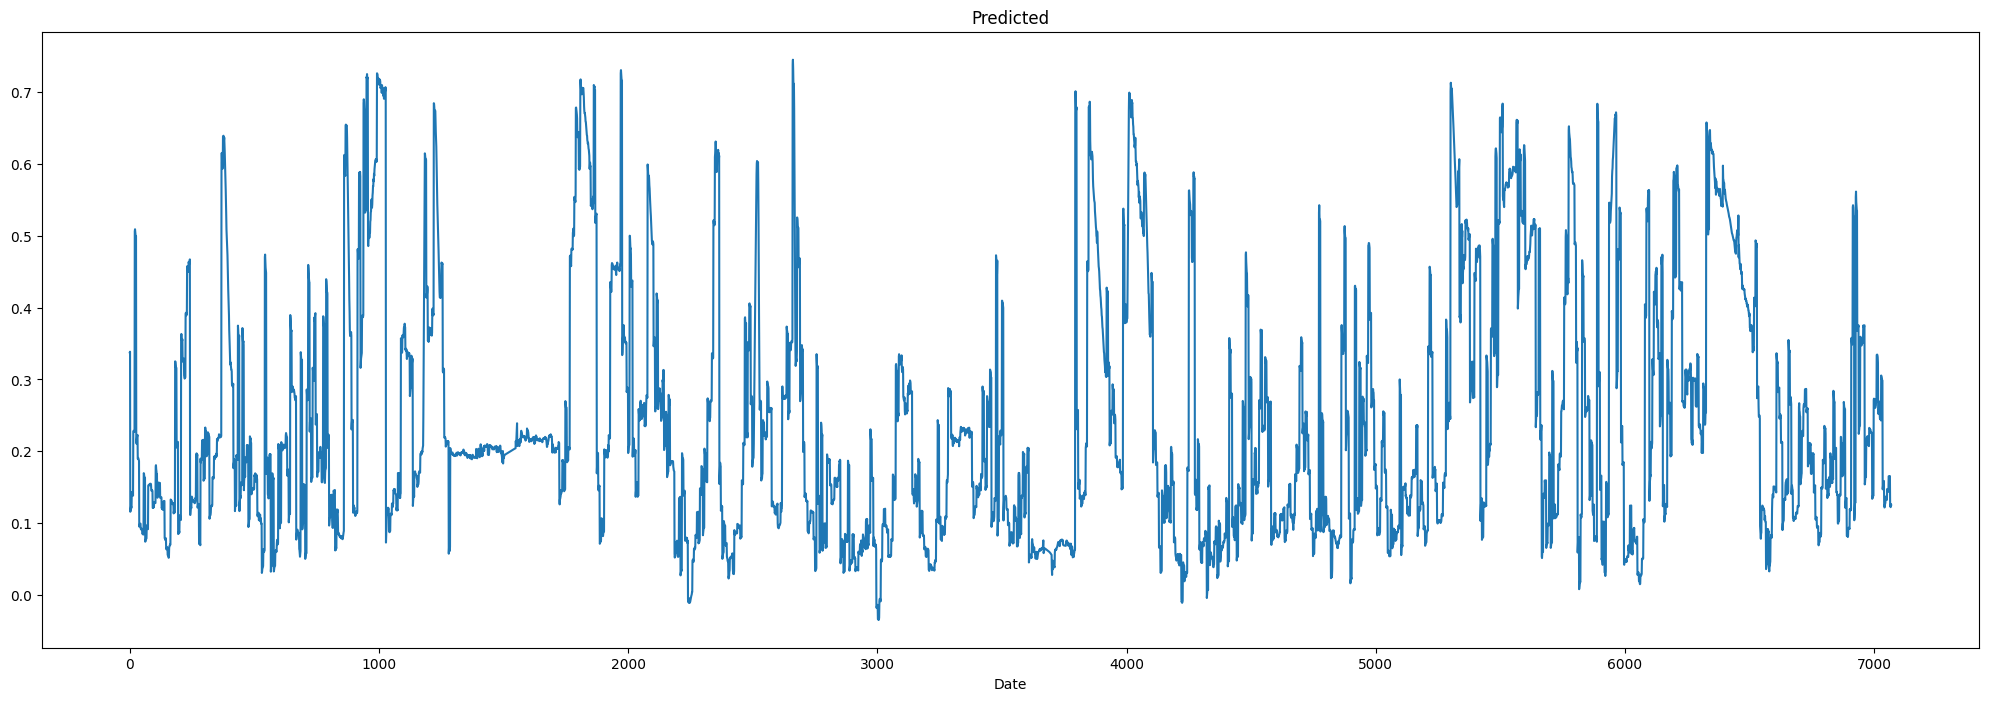

In [143]:
plt.figure(figsize=(25,8))
plt.plot(y_predict_test)
plt.xlabel('Date')
plt.title('Predicted')